# NBA PLAYOFF PREDICTION
This project develops a model that would predict the teams that would qualify for the 2022-2023 NBA PLAYOFFS from both East and west conference and the eventual winners of each conference and the NBA finals.

## Import Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

## Data for teams performance (ELO)

In [80]:
# Data for teams performance from 1947-2023
elo_1 = pd.read_csv("nba_elo.csv")

In [81]:
pd.set_option("display.max_columns", 1000) # This line helps to view all column names 
elo_1.head(2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0,0,NaN,NaN
1,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0,0,NaN,NaN


In [82]:
# Data for teams performance (2023)
elo_2= pd.read_csv("nba_elo_latest.csv")

In [83]:
pd.set_option("display.max_columns", 1000)
elo_2.tail(2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
1290,2023-04-29,2023,0,q,MEM,LAL,1579.209577,1596.783902,0.616444,0.383556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.241702,1639.912325,0.592813,0.407187,NaN,NaN,93,100,97
1291,2023-04-29,2023,0,q,MIL,MIA,1578.167412,1557.652828,0.666798,0.333202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1689.820946,1625.897028,0.688778,0.311222,NaN,NaN,95,100,98


In [84]:
pd.set_option("display.max_columns", 1000)
elo_3 = pd.read_csv("nbaallelo.csv")
# I selected only NBA teams
elo_3 = elo_3[elo_3["lg_id"] == "NBA"]

In [85]:
elo_3.head(2)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.2767,40.29483,NYK,Knicks,68,1300.0,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.7233,41.70517,TRH,Huskies,66,1300.0,1293.2767,A,W,0.359935,NaN


### Merging the Elo datasets
The Three datasets were combined to larger dataset

In [86]:
# Merging the Elo datasets

In [87]:
merged_elo = pd.concat([elo_1, elo_2, elo_3])

In [88]:
merged_elo.head(2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1946-11-01,1947.0,0.0,NaN,TRH,NYK,1300.0,1300.0,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946-11-02,1947.0,0.0,NaN,PRO,BOS,1300.0,1300.0,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
merged_elo.head(2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1946-11-01,1947.0,0.0,NaN,TRH,NYK,1300.0,1300.0,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946-11-02,1947.0,0.0,NaN,PRO,BOS,1300.0,1300.0,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Team in-game Win probability
Note: The win probability data is available for only 2014-2015 season

In [90]:
game_win_proba = pd.read_csv("nba.tsv.txt", sep="\t")
# Adding team_id to the data for easy identification
columns_1 = ["ATL", "BKN", "BOS", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHX", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"]

In [91]:
game_win_proba.insert(1, "team_id", columns_1)

In [92]:
game_win_proba.head(2)

,team,team_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Hawks,ATL,0.50659,0.51033,0.51500,0.51631,0.51853,0.52819,0.53316,0.52887,0.53559,0.53979,0.54406,0.55059,0.55654,0.54819,0.55298,0.54751,0.54967,0.56089,0.55626,0.57457,0.58205,0.57947,0.58893,0.60811,0.60994,0.61638,0.62932,0.64055,0.63623,0.64583,0.65302,0.66626,0.66367,0.68585,0.68545,0.68699,0.69889,0.70126,0.70873,0.71627,0.73074,0.74168,0.76403,0.78034,0.78955,0.79571,0.81632,0.83095,0.80556
1,Nets,BKN,0.50290,0.50561,0.50916,0.51488,0.51580,0.51226,0.52629,0.51997,0.52036,0.52213,0.51841,0.51452,0.52263,0.52271,0.52445,0.51666,0.51149,0.50685,0.50886,0.50070,0.49120,0.48797,0.49266,0.48054,0.47683,0.48004,0.47737,0.46924,0.46477,0.44831,0.43876,0.43952,0.43324,0.42479,0.42033,0.41381,0.41389,0.40248,0.39898,0.40743,0.41453,0.42484,0.42403,0.44106,0.43498,0.40266,0.39979,0.41820,0.42308


In [93]:
# merged the Elo team performance with Teams in-game win probability
total = pd.concat([merged_elo, game_win_proba])

In [94]:
# Filling null values with zeros
total.fillna(0, inplace=True)

In [95]:
# reset the index of the dataframe
total = total.reset_index(drop=True)

In [96]:
# I Assigned each team to the conference it belongs
east_conference = ["BOS", "CHI", "ATL", "BKN", "CLE", "CHA", "NYK", "DET", "MIA", "PHI", "IND", "ORL", "TOR", "MIL", "WAS"]
west_conference = ["DEN", "GSW", "DAL", "MIN", "LAC", "HOU", "OKC", "LAL", "MEM", "POR", "PHX", "NOP", "UTA", "SAC", "SAS"]

In [97]:
# splitting teams into conferences
def conference(team_id):
    """ This function helps to split each team to the conference it belongs"""
    if team_id in east_conference:
        return "east"
    elif team_id in west_conference:
        return "west"
total["conference"] = total["team_id"].apply(conference)     

In [98]:
total.conference.value_counts()

east    49348
west    38647
Name: conference, dtype: int64

In [99]:
# Create a column to select seasons a team won (more than 42 wins out of 82 games played)
def winning_season(column):
    """This function helps to separate teams that have won more than 42 games"""
    if column > 42:
        return 1
    return 0
total["wins"] = total["win_equiv"].apply(winning_season)

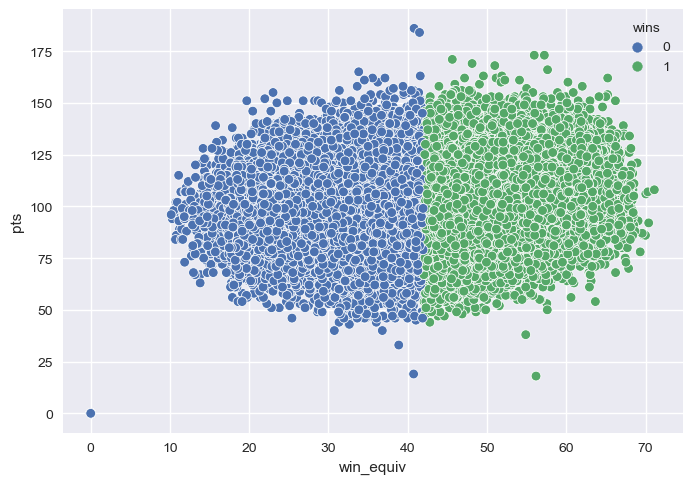

In [100]:

sns.scatterplot(x="win_equiv", y="pts", hue = "wins",data= total);

The figure below shows teams have won and lost about thesame number of games

<AxesSubplot:xlabel='game_result', ylabel='count'>

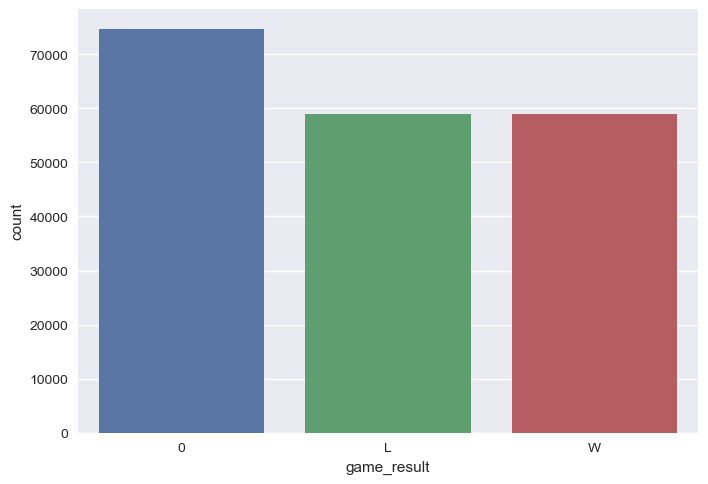

In [101]:
sns.countplot(data = total, x = "game_result")

The teams have won and lost equal number of matches over the years

In [102]:
total.head(2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,team,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,conference,wins
0,1946-11-01,1947.0,0.0,0,TRH,NYK,1300.0,1300.0,0.640065,0.359935,1293.2767,1306.7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,68.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0
1,1946-11-02,1947.0,0.0,0,PRO,BOS,1300.0,1300.0,0.640065,0.359935,1305.1542,1294.8458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,53.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0


In [103]:
# Lets how the columns are correlated with the target variable
total.corr()["is_playoffs"]

season      -0.158779
neutral     -0.006581
elo1_pre    -0.158079
elo2_pre    -0.158086
elo_prob1   -0.149183
               ...   
45          -0.002382
46          -0.002374
47          -0.002360
48          -0.002360
wins         0.252905
Name: is_playoffs, Length: 86, dtype: float64

In [104]:
# Mapping the values of east to 0 and west to 1
total["conference"] = total["conference"].map({"east":0, "west":1, None:-9999})

In [105]:
# I have separated the columns into numeric and categorical column
df_numeric_col = total.select_dtypes("number")
df_object_col = total.select_dtypes("object")

In [106]:
df_numeric_col.columns

Index(['season', 'neutral', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2',
       'elo1_post', 'elo2_post', 'carm-elo1_pre', 'carm-elo2_pre',
       'carm-elo_prob1', 'carm-elo_prob2', 'carm-elo1_post', 'carm-elo2_post',
       'raptor1_pre', 'raptor2_pre', 'raptor_prob1', 'raptor_prob2', 'score1',
       'score2', 'quality', 'importance', 'total_rating', 'gameorder',
       '_iscopy', 'year_id', 'seasongame', 'is_playoffs', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_pts', 'opp_elo_i', 'opp_elo_n', 'forecast',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       'conference', 'wins'],
      dtype='object')

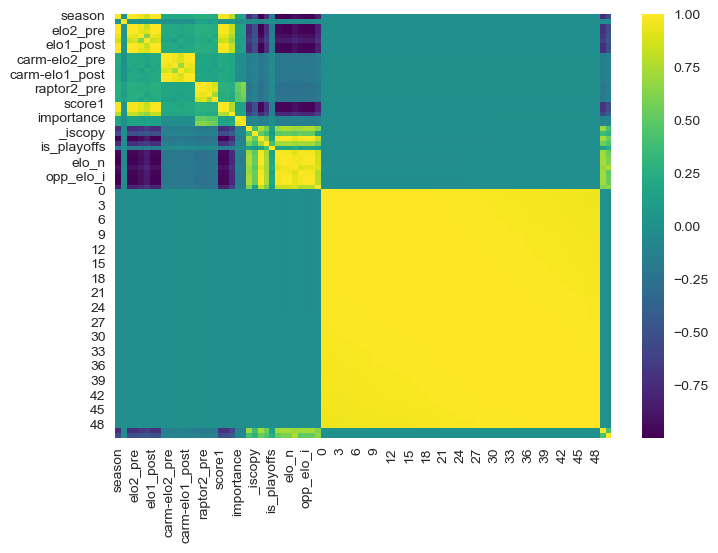

In [107]:
# Because of the number of the columns the heatmap looks clustered together
sns.heatmap(data=df_numeric_col.corr(), cmap="viridis");

### Transformation/ Scaling

In [108]:
### Transformation/ Scaling
# Machine learning models works well when our data is scaled (i.e have values between 0 and 1)
remove_columns = ["is_playoffs", "win_equiv", "wins"]

In [109]:
selected_columns = df_numeric_col.columns[df_numeric_col.columns.isin(remove_columns)]

In [110]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
total[selected_columns] = scaler.fit_transform(total[selected_columns])

In [111]:
target = total["is_playoffs"]

In [112]:
total.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,team,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,conference,wins
0,1946-11-01,1947.0,0.0,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,68.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0.0
1,1946-11-02,1947.0,0.0,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,53.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0.0
2,1946-11-02,1947.0,0.0,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,51.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0.0
3,1946-11-02,1947.0,0.0,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,47.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0.0
4,1946-11-02,1947.0,0.0,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,50.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0.0


In [113]:
df_numeric_col.head()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,conference,wins
0,1947.0,0.0,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0
1,1947.0,0.0,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0
2,1947.0,0.0,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0
3,1947.0,0.0,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0
4,1947.0,0.0,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999,0


In [114]:
# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [115]:
X_train, x_test, Y_train, y_test = train_test_split(df_numeric_col, target, test_size=0.2, random_state=42)

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. 

In [116]:
# Initializing logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred =log_reg.predict(x_test)

C:\Users\TEMITOPE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
# The model has a 99% accurarcy
accuracy_score(y_test, y_pred)

0.9915401582976515

In [118]:
# Initializing a Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
y_predict = tree.predict(x_test)

In [119]:
# The model has a 100% accuracy
accuracy_score(y_test, y_predict)

1.0

<AxesSubplot:>

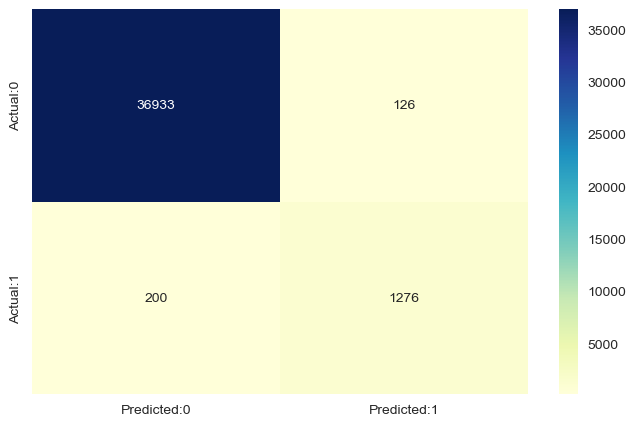

In [120]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")

The confusion matrix shows 36933 + 1276 = 38209 correct predictions and 200 + 126 = 326 incorrect ones
- True Positive: 1276
- True Negatives: 36933
- False Positives: 126
- False Negatives: 200

In [121]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### Model Evaluation Statistics

In [122]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9915401582976515 
 The Missclassification = 1-Accuracy =  0.00845984170234848 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8644986449864499 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9966000161903991 
 Positive Predictive value = TP/(TP+FP) =  0.9101283880171184 
 Negative predictive Value = TN/(TN+FN) =  0.994613955241968 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  254.26551813136953 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.13596362915135932


__From the the above statistics it is clear that the model perform best with specificity than sensitivity, though both had a high score. The team that will lose are predicted more accurately than the that will win__

In [123]:
# 0 represent East Conference while 1 represent west conference. Teams from east conference are more likely to qualify for playoff than team from west conference
total.groupby("conference").apply(lambda x: x[x["game_result"] == "L"].shape[0] / x.shape[0])

conference
-9999    0.149248
 0       0.498115
 1       0.486558
dtype: float64

0 represent East Conference while 1 represent west conference. Teams from east conference are more likely to qualify for playoff than team from west conference

### Predicted probabilities of  0 Prob that a team will not qualify for playoffs and 1 Prob that a team will qualify for playoff  for the test data with a default classification threshold of 0.5

In [127]:
y_pred_prob=log_reg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob that a team will not qualify for playoffs (0)','Prob that ateam will qualify for playoff (1)'])
y_pred_prob_df.head()

,Prob that a team will not qualify for playoffs (0),Prob that ateam will qualify for playoff (1)
0,1.00000,2.658135e-07
1,1.00000,4.084304e-08
2,0.99117,8.830446e-03
3,1.00000,1.811082e-07
4,1.00000,8.809128e-09


### Conclusion
- The teams have won and lost equal number of matches over the years
- The model perform best with specificity than sensitivity, though both had a high score. The team that will lose are predicted more accurately than the that will win
- 0 represent East Conference while 1 represent west conference. Teams from east conference are more likely to qualify for playoff than team from west conferenc